# Python Learn by Doing: Climate Change Indicators

Developed By: Dr. Kerrie Geil, Mississippi State University

Date: January 2024

Requirements: list space, RAM, and pacakge requirements

Link: notebook available to download at 

<u> Description </u>

This notebook helps the learner build intermediate python programming skills through data query, manipulation, analysis, and visualization. Learning will be centered around obtaining climate data, computing climate change indices, and determining the statistical significance of change. The notebook is aimed at learners who already have some knowledge of programming and statistics. 

<u> Summary of Contents </u>

put an outline of tasks/skills here

-----

### Introduction to Climate Change Indicators

Put a description of what they are

Include a bunch of links

Spell out which ones we will be computing

Selection of ETCCDI Climate Extremes Indices
- Monthly Maximum Value of Daily Minimum Temperature (TNx)
- Growing Season Length (GSL)
- Warm Spell Duration Index (WSDI)
- Monthly Maximum Consecutive 5-day Precipitation (Rx5day)
- Maximum Length of Consecutive Dry Days (CDD)
- Annual Total Precip Amount Over 99th Percentile of Wet Days (R99pTOT)

**Disclaimer:** This notebook is intended for python programming learning only. The data quality checking and calculation of ETCCDI climate change indices in this notebook may differ slightly from the ETCCDI published instructions for simplicity and/or relevance to our learning goals. Learners wanting to compute the indices according to the exact ETCCDI instructions should consult their [documentation](https://etccdi.pacificclimate.org/index.shtml) and/or use the [RClimDex software package](https://github.com/ECCC-CDAS/RClimDex.git) written in R to calculate ETCCDI climate change indices. The indices calculated from multiple gridded datasets are also available from [climdex.org](https://www.climdex.org/), which also offers a similar software package for calculating the indices on a dataset of your choice.   


For the climate change indices covered in this notebook we will need the following observational data over many data years:

variable abbrev. | description | frequency | units
---|---|---|---
tmin | minimum surface air temperature | daily | C 
tmax | maximum surface air temperature | daily | C
prcp | accummulated precipitation | daily | mm

### Importing Python Packages and Defining Your Workspace


In [1]:
# importing all the python packages we will need here

import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlretrieve

In [2]:
# learners need to update these paths to reflect locations on their own computer/workspace

# path to your working directory (where this notebook is on your computer)
# work_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_py_training/learn_by_doing/climate_change_indicators/' 
work_dir = r'C://Users/kerrie.WIN/Documents/code/MSU_py_training/learn_by_doing/climate_change_indicators/' 

# path to where you'll download and store the data files
# data_dir = r'C://Users/kerrie/Documents/02_LocalData/tutorials/learn_by_doing/climate_change_indicators/' 
data_dir = r'C://Users/kerrie.WIN/Documents/data/tutorials/learn_by_doing/climate_change_indicators/' 

# path to write output files and figures
# output_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_py_training/learn_by_doing/climate_change_indicators/outputs/'
output_dir = r'C://Users/kerrie.WIN/Documents/code/MSU_py_training/learn_by_doing/climate_change_indicators/outputs/'


# create directories if they don't exist here

### Obtaining the Data

Describe the data requirements (importance of time dimension standardization and missing data) 

Warnings against performing climate change analyses on just any dataset (example PRISM)

Warnings about high resolution spatial data (much of it is interpolated, high res not always better)

Why we choose to use certain datasets

Links to each dataset's webpage

In [4]:
url = 'https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt'
filename = data_dir+'ghcnd-inventory.txt'

# urlretrieve(url, filename)

In [5]:
# load metadata file
import pandas as pd
colnames=['ID','LAT','LON','VAR','START','END']
df = pd.read_csv(filename,sep='\s+', names=colnames)
df

,ID,LAT,LON,VAR,START,END
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
746475,ZI000067983,-20.2000,32.6160,PRCP,1951,2023
746476,ZI000067983,-20.2000,32.6160,TAVG,1962,2023
746477,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
746478,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


In [6]:
# subset to United States Coop Network stations
df=df.loc[df['ID'].str.contains('USC')]
df

,ID,LAT,LON,VAR,START,END
407267,USC00010008,31.5703,-85.2483,PRCP,1948,2014
407268,USC00010008,31.5703,-85.2483,SNOW,1948,2010
407269,USC00010008,31.5703,-85.2483,SNWD,1948,2010
407270,USC00010008,31.5703,-85.2483,DAPR,1954,2007
407271,USC00010008,31.5703,-85.2483,DASF,1973,1973
...,...,...,...,...,...,...
687408,USC00914401,23.8667,-166.2833,SNOW,1958,1978
687409,USC00914401,23.8667,-166.2833,SNWD,1958,1978
687410,USC00914401,23.8667,-166.2833,DAPR,1960,1975
687411,USC00914401,23.8667,-166.2833,MDPR,1960,1975


In [7]:
# subset to variables we want
df =df[df.VAR.isin(['TMIN','TMAX','PRCP'])]
df

,ID,LAT,LON,VAR,START,END
407267,USC00010008,31.5703,-85.2483,PRCP,1948,2014
407280,USC00010063,34.2108,-87.1783,TMAX,2001,2023
407281,USC00010063,34.2108,-87.1783,TMIN,2001,2023
407283,USC00010063,34.2108,-87.1783,PRCP,1938,2023
407294,USC00010071,34.4167,-87.3167,PRCP,1949,1962
...,...,...,...,...,...,...
687393,USC00519955,21.8939,-159.5128,PRCP,1949,2023
687400,USC00519980,21.2983,-157.7853,PRCP,1949,2023
687405,USC00914401,23.8667,-166.2833,TMAX,1953,1978
687406,USC00914401,23.8667,-166.2833,TMIN,1953,1978


In [8]:
# subset to stations with many data years
df=df[(df.START<1950) & (df.END>2010)]
df

,ID,LAT,LON,VAR,START,END
407267,USC00010008,31.5703,-85.2483,PRCP,1948,2014
407283,USC00010063,34.2108,-87.1783,PRCP,1938,2023
407308,USC00010140,32.2322,-87.4103,PRCP,1940,2015
407363,USC00010178,33.1272,-88.1550,TMAX,1934,2023
407364,USC00010178,33.1272,-88.1550,TMIN,1934,2023
...,...,...,...,...,...,...
687363,USC00519629,21.9592,-159.6758,PRCP,1949,2017
687376,USC00519738,21.3861,-158.0069,PRCP,1906,2020
687385,USC00519765,20.6306,-156.2042,PRCP,1905,2023
687393,USC00519955,21.8939,-159.5128,PRCP,1949,2023


In [9]:
# subset to stations that have all three variables
df=df.groupby('ID').filter(lambda x: len(x)==3)
df

,ID,LAT,LON,VAR,START,END
407363,USC00010178,33.1272,-88.1550,TMAX,1934,2023
407364,USC00010178,33.1272,-88.1550,TMIN,1934,2023
407366,USC00010178,33.1272,-88.1550,PRCP,1934,2023
407382,USC00010252,31.3072,-86.5225,TMAX,1912,2018
407383,USC00010252,31.3072,-86.5225,TMIN,1912,2018
...,...,...,...,...,...,...
686225,USC00517150,21.5739,-158.0378,TMIN,1949,2015
686227,USC00517150,21.5739,-158.0378,PRCP,1949,2015
686279,USC00517312,20.0400,-155.3725,TMAX,1934,2023
686280,USC00517312,20.0400,-155.3725,TMIN,1934,2023


In [10]:
# subset to Mississippi
df = df[(df.LON<-88.0978)&(df.LON>-91.6650)&(df.LAT>30.1739)&(df.LAT<34.9960)]
df

,ID,LAT,LON,VAR,START,END
407363,USC00010178,33.1272,-88.1550,TMAX,1934,2023
407364,USC00010178,33.1272,-88.1550,TMIN,1934,2023
407366,USC00010178,33.1272,-88.1550,PRCP,1934,2023
408004,USC00011566,31.4714,-88.2503,TMAX,1949,2019
408005,USC00011566,31.4714,-88.2503,TMIN,1949,2019
...,...,...,...,...,...,...
520104,USC00229639,30.8714,-89.1214,TMIN,1946,2023
520106,USC00229639,30.8714,-89.1214,PRCP,1946,2023
520146,USC00229793,31.0931,-91.2325,TMAX,1893,2012
520147,USC00229793,31.0931,-91.2325,TMIN,1893,2012


In [13]:
df['NYEARS']=df.END-df.START+1
subTdf=df.loc[df.VAR=='TMAX']

C:\Users\kerrie.WIN\AppData\Local\Temp\ipykernel_19296\2318036898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NYEARS']=df.END-df.START+1


In [14]:
df_long=df[df.NYEARS>=100]
df_long=df_long.groupby('ID').filter(lambda x: len(x)==3)
df_long

,ID,LAT,LON,VAR,START,END,NYEARS
409361,USC00014798,32.5811,-88.1897,TMAX,1891,2014,124
409362,USC00014798,32.5811,-88.1897,TMIN,1891,2014,124
409364,USC00014798,32.5811,-88.1897,PRCP,1891,2014,124
418774,USC00030936,34.8822,-91.2153,TMAX,1883,2017,135
418775,USC00030936,34.8822,-91.2153,TMIN,1883,2017,135
...,...,...,...,...,...,...,...
520022,USC00229439,31.6772,-88.6708,TMIN,1892,2023,132
520024,USC00229439,31.6772,-88.6708,PRCP,1892,2023,132
520146,USC00229793,31.0931,-91.2325,TMAX,1893,2012,120
520147,USC00229793,31.0931,-91.2325,TMIN,1893,2012,120


In [16]:
df_long=df_long[(df_long.END>=2020)&(df_long.START<=1920)]
df_long

,ID,LAT,LON,VAR,START,END,NYEARS
419450,USC00031968,34.9772,-91.4978,TMAX,1903,2023,121
419451,USC00031968,34.9772,-91.4978,TMIN,1903,2023,121
419453,USC00031968,34.9772,-91.4978,PRCP,1903,2023,121
420250,USC00033242,34.5211,-90.5900,TMAX,1897,2023,127
420251,USC00033242,34.5211,-90.5900,TMIN,1897,2023,127
...,...,...,...,...,...,...,...
519993,USC00229400,34.1583,-89.6311,TMIN,1900,2023,124
519995,USC00229400,34.1583,-89.6311,PRCP,1893,2023,131
520021,USC00229439,31.6772,-88.6708,TMAX,1892,2023,132
520022,USC00229439,31.6772,-88.6708,TMIN,1892,2023,132


In [17]:
df_long.ID.unique()

array(['USC00031968', 'USC00033242', 'USC00034638', 'USC00035866',
       'USC00162151', 'USC00168163', 'USC00168923', 'USC00220021',
       'USC00220488', 'USC00220792', 'USC00220955', 'USC00221094',
       'USC00221314', 'USC00221389', 'USC00221707', 'USC00221738',
       'USC00221865', 'USC00221962', 'USC00222094', 'USC00223887',
       'USC00223975', 'USC00224776', 'USC00224939', 'USC00225247',
       'USC00225987', 'USC00226177', 'USC00227128', 'USC00227132',
       'USC00228374', 'USC00229079', 'USC00229400', 'USC00229439'],
      dtype=object)

In [18]:
df_tx=df_long[df_long.VAR=='TMAX']

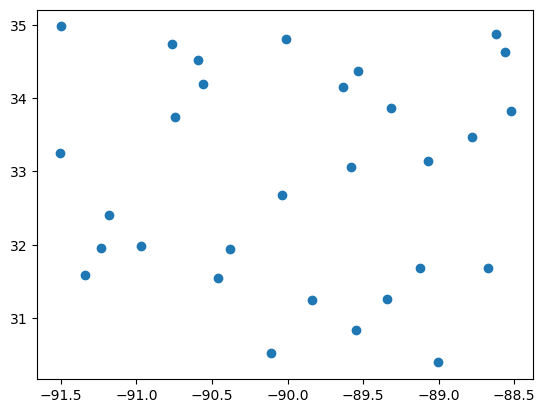

In [19]:
# import matplotlib.pyplot as plt
plt.scatter(x=df_tx['LON'], y=df_tx['LAT'])
plt.show()

In [21]:
df_tx.sort_values(['LON','LAT'],axis=0)

,ID,LAT,LON,VAR,START,END,NYEARS
421830,USC00035866,33.2511,-91.5058,TMAX,1909,2023,115
419450,USC00031968,34.9772,-91.4978,TMAX,1903,2023,121
518599,USC00226177,31.5889,-91.3408,TMAX,1892,2023,132
492980,USC00168163,31.9497,-91.2336,TMAX,1894,2023,130
493375,USC00168923,32.3994,-91.1842,TMAX,1907,2022,116
519046,USC00227132,31.9850,-90.9719,TMAX,1893,2023,131
420914,USC00034638,34.7392,-90.7664,TMAX,1899,2023,125
517188,USC00221738,33.7367,-90.7444,TMAX,1901,2023,123
420250,USC00033242,34.5211,-90.5900,TMAX,1897,2023,127
517157,USC00221707,34.1864,-90.5572,TMAX,1892,2023,132


In [ ]:
# MSU is USC00228374

describe any steps taken prior to here to decide on the station etc.

In [ ]:
# download/unzip temperature data

In [ ]:
# download/unzip precipitation data

### Data Cleaning / Quality Control

The minimum quality control procedures suggested by ETCCDI are as follows.

Replace data value with Nan for:
- user-defined missing values (i.e -99.9-->Nan)
- daily precip values less than 0
- daily max temperature less than daily minimum temperature
- daily temperature greater than 70C (158F) or less than -70C (-94F)
- leap days (i.e Feb 29th)
- impossible dates (i.e. 32nd March, 12th June 2042)
- non-numeric values
- daily temperature outliers (i.e. 3-5 times the standard deviation from the mean value for each calendar day)



### Monthly Maximum Value of Daily Minimum Temperature (TNx)

- max(each month of daily minimum temperature values)

Here we are inputting daily data and pulling out 1 value per month.

### Growing Season Length (GSL)

- annually, growing season starts on the first day of the first six consecutive day period where daily mean temperature is > 5C
- annually, growing season ends on the first day after 1 July of the first six consecutive day period where daily mean temperature is < 5C

Here we are inputting daily data, pulling out 2 dates per year, and calculating the number of days between the two dates.


### Warm Spell Duration Index (WSDI)

- 6 consecutive days of hot temperatures
- hot temperature threshold defined as > 90th percentile temperature for each calendar day using a centered 5-day window in the base period 1961-1990
- warm spells that contain dates for multiple years are assigned to the year when the spell ends

Here we first use daily data during the base period to determine the daily 90th percentile temperature threshold. Then using all years of daily data we decide whether each calendar day exceeds the hot threshold, then find occurrences where the threshold is exceeded for at least 6 consecutive days (this is a warm spell), then sum the number of days annually in the warm spells.

Notice that this is not the same as finding dangerous heat waves with respect to human health because it is based on a temperature threshold for each calendar day. This means that the WSDI will include winter warm spells where the temperature exceeds the 90th percentile of winter daily temperature, which would likely be a comfortable temperature.

### Monthly Maximum Consecutive 5-day Precipitation (Rx5day)

- max(5-day rolling mean precipitation within each month)

Here we are inputting daily data, for each month calculating the mean precipitation amount for each 5-day window of data values, then choosing the maximum of 5-day window value for each month.


### Maximum Length of Consecutive Dry Days (CDD)

- annually, during the growing season (using mean start and mean end)
- maximum length of consecutive days where precipitation is < 1mm

Here we are inputting daily data, subsetting to data during the growing season, determining whether each day falls under the precipitation threshold, and finding the longest period of consecutive days each year that meets the threshold requirement. 


### Annual Total Precip Amount Over 99th Percentile on Wet Days (R99pTOT)

- annually, the sum of precipitation when precipitation is > 99th percentile of wet day precipitation in the base period 1961-1990
- where a wet day is precipitation >= 1mm

Here we first use daily data during the base period to determine the 99th percentile of wet day precipitation. Then for each year of daily data we determine if each day exceeds the threshold and calculate an annual sum of precip on days that exceed the threshold. 

### Are the Changes In Value of These Indices Over Time Statistically Significant?

### Computing Climate Change Indices on Gridded Data

In [ ]:
# download/unzip data

In [ ]:
# repeat one of the above analysis

In [ ]:
# visualize

# Your Turn!

### Choose one of three coding mini-projects below to complete on your own and prepare to share your findings


**Option 1 (easiest):** Calculate the monthly mean daily temperature range (DTR) at the xx station a create a figure showing the DTR timeseries. 

&emsp;Hints:
- Use daily tmax and tmin data
- Calculate the daily temperature range as tmax-tmin
- For each month, find the mean of the range values you calculated in the previous step
- Plot your timeseries of monthly values. Include axis labels and a title. 

<br>
<br>

**Option 2 (moderate):** Calculate the cold spell duration index (CDSI) at the xx station and create a figure showing the CDSI timeseries. Extra: see if you can determine whether the change in the CDSI is statistically significant.

&emsp;Hints:
- Use daily tmin data
- Find the daily 10th percentile temperature using a centered 5-day window over the base period 1961-1990
- Using all data years, determine if each day exceeds the threshold (looking for days with tmin < threshold)
- Identify cold spells as periods of 6 consecutive days when the temperature exceeds the threshold
- Count how many total cold spell days there are annually (remember each cold spell is assigned to the year when the spell ends)
- Plot the timeseries of annual values. Include axis labels and a title.
- Extra Step: Determine statistical significance of the trend line (linear regression) or the difference in means between two 30-year periods (1941-1970) and (1991-2020).

<br>
<br>


**Option 3 (hardest):** Use a gridded dataset to compute the annual growing season length (GSL) at each grid cell. Then, calculate the trend in GSL at each grid cell and also determine whether each trend is statisically significant. Present your results in a figure that shows the GSL trend for each grid cell (on a map) and include an indication of whether each grid cell value is statistically significant.

&emsp;Hints:
- Use gridded daily tmax and tmin data
- Calculate daily mean temperature
- Use the same process we showed previously to determine the annual start/end of the growing season and find the annual GSL, except this time do the calculations at each grid cell.
- Calculate the trend (linear regression) in annual GSL at each grid cell.
- Determine if each trend is statistically significant.
- Plot the the map of trend values and indicate significance at each grid with hatching or some other visual indicator. Include a title and legend.



In [ ]:
# peek at the answer figure for option 1

In [ ]:
# peek at the answer figure for option 2

In [ ]:
# peek at the answer figure for option 3

Don't forget to create answer codes for these and put them in the repo. Direct learners to answers after the work-on-your-own session.